<a href="https://colab.research.google.com/github/pjwu1997/Financial_Economics/blob/master/Efficient_Frontier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

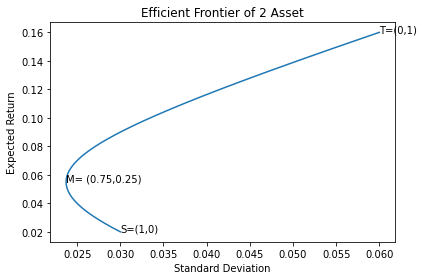

In [0]:
# expected return & standard deviation of portfolio that contains 2 assets
import numpy as np
import matplotlib.pyplot as plt

class asset():
    def __init__(self,returns,deviation):
        self.returns = returns
        self.deviation = deviation
def stddev_twoasset(alpha,dev_a,dev_b,cor_ab):
    return np.sqrt(((alpha*dev_a)**2) + (((1-alpha)*dev_b)**2) + 2 * dev_a * dev_b * cor_ab * alpha * (1-alpha))

def exp_twoasset(alpha,exp_a,exp_b):
    return alpha*exp_a + (1-alpha)*exp_b

asset_1 = asset(0.02,0.03)
asset_2 = asset(0.16,0.06)
cor_ab = -0.25

exp_lst = []
stddev_lst = []
alpha_lst = []
for alpha in np.arange(1,-0.001,-0.001):
    exp_lst.append(exp_twoasset(alpha,asset_1.returns,asset_2.returns))
    stddev_lst.append(stddev_twoasset(alpha,asset_1.deviation,asset_2.deviation,cor_ab))
    alpha_lst.append(alpha)

info = np.array(stddev_lst)
info = np.append(info,exp_lst)
info = np.append(info,alpha_lst)

info = info.reshape((3,-1))
info.shape

ind_mindev = np.argmin(info[0])

#exp_lst

plt.plot(info[0],info[1])
plt.xlabel("Standard Deviation")
plt.ylabel("Expected Return")
plt.title("Efficient Frontier of 2 Asset")
plt.text(info[0][ind_mindev],info[1][ind_mindev],"M="+" "+"("+str(round(info[2][ind_mindev],2))+","+str(round(1-info[2][ind_mindev],2))+")")
plt.text(info[0][0],info[1][0],"S=(1,0)")
plt.text(info[0][-1],info[1][-1],"T=(0,1)")
plt.tight_layout()



